In [135]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import choices

In [136]:
def sqw_ops(N, theta_blue, theta_red):    
    II = np.eye(N)
    H_red  = np.zeros([N,N])
    H_blue = np.zeros([N,N])
    
    for x in range(N//2):
        H_red[2*x, 2*x + 1] = 1
        H_red[2*x + 1, 2*x] = 1
        
        H_blue[2*x + 1, (2*x + 2)%N] = 1
        H_blue[(2*x + 2)%N, 2*x + 1] = 1
        
    U_blue = np.cos(theta_blue)*II + 1j*np.sin(theta_blue)*H_blue
    U_red  = np.cos(theta_red)*II + 1j*np.sin(theta_red)*H_red
    
    return U_blue, U_red

### 1. Alternating Operator Order

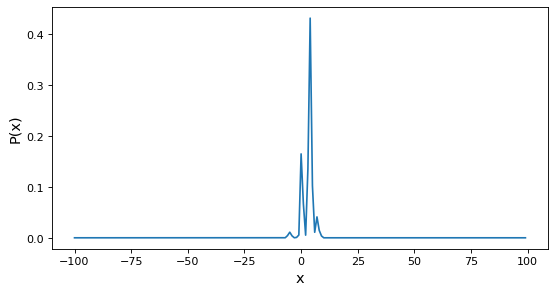

In [359]:
n = 100
N = 2*n
theta_blue = np.pi/10
theta_red  = np.pi/4

steps = 1000
exp_samples = 200

U_blue, U_red = sqw_ops(N, theta_blue, theta_red)

# initial_state[n] = 1/np.sqrt(2)
# initial_state[n+1] = 1/np.sqrt(2)
outcomes = [0, 1]
probs = [.01, .99]



mean_value = np.zeros([N,1])

for s in range(exp_samples):
    
    operator_order = [choices(outcomes, probs)[0] for x in range(steps)]
    
    initial_state = np.zeros([N,1])
    initial_state[n+1] = 1
    for t in range(steps):
        if operator_order[t] == 0:
            initial_state = U_blue @ initial_state
        else:
            initial_state = U_red @ initial_state

    mean_value += np.abs(initial_state)**2/exp_samples
            
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(np.arange(0,N)-N//2,np.abs(initial_state)**2)
plt.xlabel('x',fontsize=13)
plt.ylabel('P(x)',fontsize=13)
# plt.ylim([0,.1])
plt.show()

### 2. Alternating Two Angles

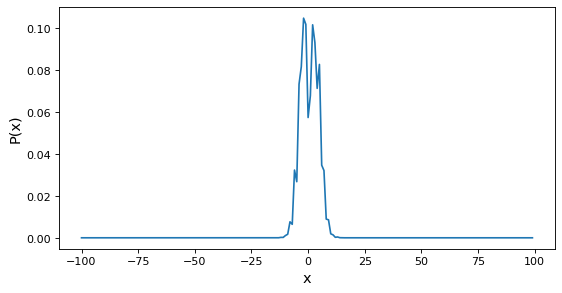

In [360]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(np.arange(0,N)-N//2,mean_value)
plt.xlabel('x',fontsize=13)
plt.ylabel('P(x)',fontsize=13)
# plt.ylim([0,.1])
plt.show()